In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import torch
from configuration import conf
from utils.data_loader import load_mnist
from models.base import Linear_base_model, Convolutional_base_model
from utils.visualise import *
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import pandas as pd
from playground.env import Environment

In [3]:
env = Environment()
x,y = env.load_data()

In [4]:
x.shape

(9000, 2)

In [5]:
df = pd.DataFrame(data={'x':x[:,0],'y':x[:,1],'label':y})

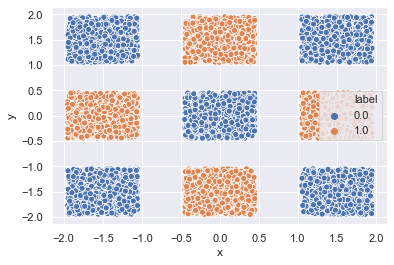

In [6]:
conf.num_distr = '5'
sns.scatterplot(x='x',y='y',hue='label',data=df)

In [7]:
trainloader = torch.utils.data.DataLoader(torch.utils.data.TensorDataset(torch.from_numpy(x).type(torch.FloatTensor),
                                           torch.from_numpy(y.reshape(y.shape[0],1)).type(torch.int64)),
                                          batch_size=10, shuffle=True, num_workers=0)

In [8]:
def plot_means():
    means = []
    stds = []
    with torch.no_grad():
        for cls in range(2):
            for i in model.last_layer.centers[cls]:
                means.append(i[0].detach().numpy())
                stds.append(i[1].detach().numpy())
    means = np.array(means)
    print('mean')
    print(means)
    print('stds')
    print(np.log(1+np.exp(stds)))
    mean_len = len(means)
    plt.scatter(means[range(mean_len//2),0],means[range(mean_len//2),1], label='class 0')
    plt.scatter(means[range(mean_len//2, mean_len),0],means[range(mean_len//2,mean_len),1], label='class 1')
    plt.legend()

# Dynamic Estimator

In [9]:
conf.last_layer = 'DY'
model = Linear_base_model()
model.train_model(trainloader, verbose=0)

/opt/anaconda3/envs/pytorch/lib/python3.6/site-packages/torch/nn/modules/loss.py:498: UserWarning: Using a target size (torch.Size([10, 1, 2])) that is different to the input size (torch.Size([10, 2])) is deprecated. Please ensure they have the same size.
  return F.binary_cross_entropy(input, target, weight=self.weight, reduction=self.reduction)


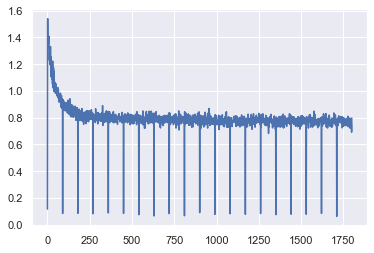

In [10]:
plt.plot(model.history['loss'])

mean
[[-0.01814792 -0.01294953]
 [ 0.05066198  0.34868735]
 [ 0.26323098  0.25403404]
 [ 0.99688953  0.26843053]
 [ 0.6227677   0.8225235 ]
 [ 2.423653   -0.00869064]
 [ 0.30179662  0.38381422]
 [ 0.4132412   0.48176378]
 [ 0.6877659   0.38381243]
 [ 0.72443753  0.7655609 ]]
stds
[[1.7052616  1.7097867 ]
 [0.92696774 1.0885813 ]
 [1.0729314  0.81512237]
 [0.84514415 0.9189783 ]
 [1.0879238  0.7359985 ]
 [3.137099   1.1858139 ]
 [0.8563734  0.74005884]
 [0.95372236 0.7504412 ]
 [0.92729557 0.7404921 ]
 [0.88447696 0.9023485 ]]


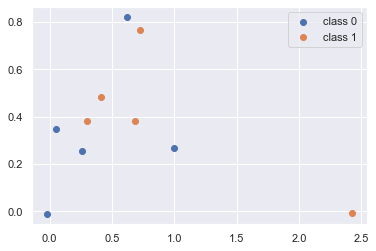

In [11]:
plot_means()

In [12]:
model.get_distr_index((x,y), False)

(tensor([0, 0, 0,  ..., 4, 0, 0]), tensor([0, 0, 0,  ..., 0, 0, 0]))

# Density Estimator

In [13]:
conf.last_layer = 'DE'
model = Linear_base_model()
model.train_model(trainloader, verbose=0)

mean
[[-0.00727057 -0.01486251]
 [ 0.30797297  0.6901677 ]
 [ 0.75664663  0.79065114]
 [ 0.9218947   0.5936686 ]
 [ 0.57057905  0.8834268 ]
 [ 2.5388882  -0.00764877]
 [ 0.10833538  0.24178231]
 [ 0.08898121  0.7568627 ]
 [ 0.94868106  0.1072666 ]
 [ 0.5917554   0.00993311]]
stds
[[1.6882293  1.6912901 ]
 [1.2609234  0.7048288 ]
 [1.1098818  0.74233687]
 [0.91427505 1.2790636 ]
 [0.8264396  0.99256784]
 [3.283923   1.2031174 ]
 [0.8910322  1.0966163 ]
 [1.0652369  0.9111502 ]
 [0.8588649  0.9681524 ]
 [0.908068   0.8434163 ]]


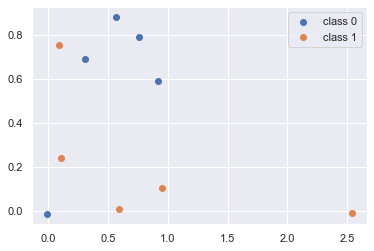

In [14]:
plot_means()

# PNN

In [11]:
conf.last_layer = 'PNN'
model = Linear_base_model()
model.train_model(trainloader, verbose=0)

/opt/anaconda3/envs/pytorch/lib/python3.6/site-packages/torch/nn/modules/loss.py:498: UserWarning: Using a target size (torch.Size([10, 1, 2])) that is different to the input size (torch.Size([10, 2])) is deprecated. Please ensure they have the same size.
  return F.binary_cross_entropy(input, target, weight=self.weight, reduction=self.reduction)


mean
[[ 1.56411028e+00  1.55931270e+00]
 [-2.90810496e-01 -2.83031017e-01]
 [-2.88969606e-01 -2.83577859e-01]
 [ 2.38478720e-01  1.15559384e-01]
 [-2.90095359e-01 -2.85690099e-01]
 [ 1.96057931e-01  1.56041765e+00]
 [-1.96407467e-01  1.55646360e+00]
 [ 1.54207730e+00  2.23239578e-04]
 [-1.32025182e-02 -1.56180942e+00]
 [-1.54217529e+00 -2.81274947e-03]]
stds
[[0.9101459  0.95933294]
 [1.7404866  1.7396675 ]
 [1.7409394  1.7428095 ]
 [0.31525898 0.35721606]
 [1.7430532  1.7408597 ]
 [0.52669984 0.79706323]
 [0.5413989  0.8039037 ]
 [0.99315643 0.78993547]
 [0.8081127  1.0405166 ]
 [0.9580231  0.786823  ]]


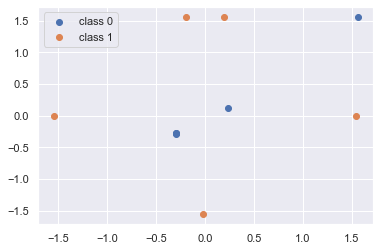

In [12]:
plot_means()

In [15]:
model(torch.from_numpy(x))

tensor([[0.4494, 0.1098],
        [0.5530, 0.1255],
        [0.5317, 0.1419],
        ...,
        [0.9381, 0.0431],
        [0.8886, 0.0241],
        [0.9108, 0.0546]], dtype=torch.float64, grad_fn=<StackBackward>)